# Model project: Cournot competition

In the following project, we searh to model how two competing firms determine the optimal amount of a homogenous good to produce in Cournot competition. 

We are assuming the following points throughout the assignment:
- There are two firms (1 and 2), who produce the same good (homogenous) (in the extension, we observe three firms)
- No collusion
- The two firms simultaneously choose the quaintity to produce ($q_1$ and $q_2$).
- The total amount produced is $Q = q_1 + q_2$
- The market price is decreasing in the total quantity: $P(Q)=a-Q$
- Both firms have the same marginal cost $c$, where $0 \leq c<a$

In [20]:
import numpy as np
from numpy import array

from scipy import linalg
from scipy import optimize
from scipy import interpolate
from scipy import optimize,arange
import scipy as sp

import ipywidgets as widgets
import sympy as sm

import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to the economic model

We look for a Nash Equilibrium, where both firms choose their best response, as a reaction function to the other firms actions. 

The profit functions for the respective firms are:

Profit for firm 1: $\pi_1(q_1,q_2) = q_1(P(q_1+q_2)  - c) $

Profit for firm 2: $\pi_2(q_1,q_2) = q_2(P(q_1+q_2) - c)$

The price function and the marginal cost are included, and we can thereby rewrite:

$\pi_1(q_1,q_2) = (a - q_1 - q_2 - c) * q_1$

$\pi_2(q_1,q_2) = (a - q_1 - q_2 - c) * q_2$

Since both firms want to maximize profit, we calculate the best response function, as the first order condition of the profit functions, where we solve for the quantity. 

### $\frac{\partial \pi_1}{\partial q_1} = 0$ <=> $ q_1(q_2) = \frac{a-c-q_2}{2}$
### $\frac{\partial \pi_2}{\partial q_2} = 0$ <=> $ q_2(q_1) = \frac{a-c-q_1}{2}$

Given symmetry, we can now solve for the equilibirum quantities: 

### $q_1^* = \frac{a-c-\frac{(a-c-q_1^*)}{2}}{2} <=> q_1^* = \frac{a-c}{3} = q_2^*$



We firstly define the base of the model, which consists of the inverse demand function, the cost function, the profit function for firm 1 and 2, respectively. 

In [21]:
def p(q1,q2,a):
    demand = a - q1 - q2
    return demand

def cost_func(q,c):
    cost = q * c
    return cost

#Profit function for firm 1
def pi_1(q1,q2,a,c):
    profit1 = p(q1,q2,a) * q1 - cost_func(q1,c)
    return profit1

#Profit function for firm 2
def pi_2(q1,q2,a,c):
    profit2 = p(q1,q2,a) * q2 - cost_func(q2,c)
    return profit2

The firms have symmetrical best response function, as seen before, given that they are solving the same optimization problem, with identical cost and demand. 

In [22]:
q0 = [0]

def BR_f1(q2,a,c):
    optimal_Q1 = optimize.minimize(lambda q0: -pi_1(q0,q2,a,c), q0).x[0]
    return optimal_Q1

def BR_f2(q1,a,c):
    optimal_Q2 = optimize.minimize(lambda q0: -pi_2(q1,q0,a,c), q0).x[0]
    return optimal_Q2

In [23]:
def conditions(q,param):
    u = q[0] - BR_f1(q[1],param[0],param[1])
    y = q[1] - BR_f2(q[0],param[0],param[1])
    return [u,y]

In [24]:
q = [1,1]
param = [11,2]

In [25]:
solver = optimize.fsolve(conditions,q, args = (param))
print(f'the optimal parameter values are: {solver}')

the optimal parameter values are: [3. 3.]


# Plotting

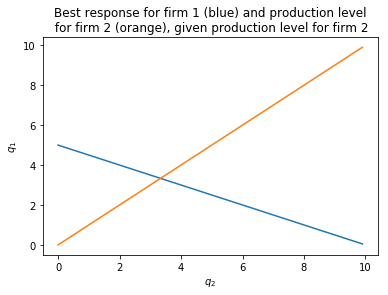

In [26]:
#Production levels for firm 2:
prod2 = np.arange(0,10,0.1)

#production level firm 1:
prod1 = []

for q2 in prod2:
    q1 = round(BR_f1(q2,10,0),3)
    prod1.append(q1)

plt.title("Best response for firm 1 (blue) and production level\n for firm 2 (orange), given production level for firm 2")
plt.ylabel("$q_1$")
plt.xlabel("$q_2$")
plt.plot(prod2, prod1)
plt.plot(prod2, prod2)

In [27]:
costs = np.arange(0,5,0.1)
prod1 = np.arange(0,5,0.1)
prod2 = np.arange(0,5,0.1)

x = []
y = []

for q2 in prod2:
    q1 = round(BR_f1(q2,10,0),3)
    x.append(q1)
    
for c, q1 in zip(costs,prod1):
    q2 = round(BR_f2(q1,10,c),3)
    y.append(q2)

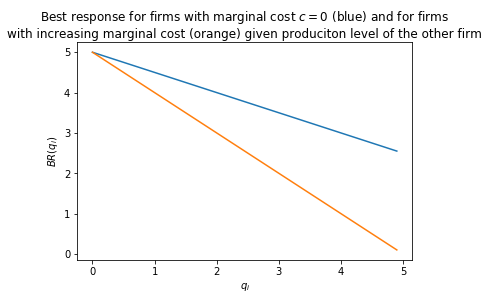

In [28]:
plt.title("Best response for firms with marginal cost $c = 0$ (blue) and for firms\nwith increasing marginal cost (orange) given produciton level of the other firm")
plt.ylabel("$BR(q_i)$")
plt.xlabel("$q_i$")
plt.plot(costs, x)
plt.plot(costs, y)

In [10]:
prod1 = np.arange(0,5,0.1)
prod2 = np.arange(0,5,0.1)

def f(c1,c2):

    x = []
    y = []

    for q2 in prod2:
        q1 = round(BR_f1(q2,10,c1),3)
        x.append(q1)

    for q1 in prod1:
        q2 = round(BR_f2(q1,10,c2),3)
        y.append(q2)

    plt.title("Best response for firm 1 with marginal cost $c_1$ (blue) and best response for\nfirm 2 with marginal cost $c_2$ (orange) given produciton level of the other firm")
    plt.ylabel("$BR(q_i)$")
    plt.xlabel("$q_i$")
    plt.plot(prod2,x)
    plt.plot(prod1,y)

widgets.interact(f,
    c1 = widgets.FloatSlider(description="$c_1$",min=0,max=5),
    c2 = widgets.FloatSlider(description="$c_2$",min=0,max=5),
 )

interactive(children=(FloatSlider(value=0.0, description='$c_1$', max=5.0), FloatSlider(value=0.0, description…

<function __main__.f(c1, c2)>

In the illustration above it is evident that if the two firms have identical marginal cost, the best response functions are completely identical (laying on top of eachother, graphically). 
If firm 1 has a higher marginal cost, their best response function is lower than firm 2. 

# Extension: Three firms 

We want to understand what the optimal production levels are if a third firm is to enter. We focus on the case where firms are symmetric, with the same cost function. 

In the following we define the inverse demand function, cost function, and three profit functions. 

In [11]:
def p(q1,q2,q3,a):
    demand = a - q1 - q2 - q3
    return demand

# We define the cost function:

def cost(q,c):
    cost = q * c
    return cost


def pi_f1(q1,q2,q3,a,c):
    return p(q1,q2,q3,a) * q1 - cost(q1,c)

def pi_f2(q1,q2,q3,a,c):
    return p(q1,q2,q3,a) * q2 - cost(q2,c)

def pi_f3(q1,q2,q3,a,c):
    return p(q1,q2,q3,a) * q3 - cost(q3,c)

We further define the tre reaction functions, where firm i will optimize relative to the two other firms. 

In [12]:
q0 = [0]

def BR1(q2,q3,a,c):
    optimal_q1 = optimize.minimize(lambda q0: -pi_f1(q0,q2,q3,a,c), q0).x[0]
    return optimal_q1

def BR2(q1,q3,a,c):
    optimal_q2 = optimize.minimize(lambda q0: -pi_f2(q1,q0,q3,a,c), q0).x[0]
    return optimal_q2

def BR3(q1,q2,a,c):
    optimal_q3 = optimize.minimize(lambda q0: -pi_f3(q1,q2,q0,a,c), q0).x[0]
    return optimal_q3

In [13]:
def con(q,param):
    u = q[0] - BR1(q[1],q[2],param[0],param[1])
    y = q[1] - BR2(q[0],q[2],param[0],param[1])
    z = q[2] - BR3(q[0],q[1],param[0],param[1])
    return [u,y,z]

In [14]:
#initial values
q = [1,1,1]

# Vector with parameters [a,c]:
param = [11,2]

In [15]:
solver = optimize.fsolve(con,q, args = (param))
print(f'optimal quantity: {solver}')

optimal quantity: [2.24999997 2.25000001 2.25000001]


Inclusion of an additional firm, reduces the optimal quantity, which as we saw before was 3 for both firms.

# Conclusion 

Two firms with identical demand functions and marginal cost, are symmetrical, and thereby set the same equilibrium quantities. We have learned that the marginal cost (when rising), has a negative effect on the best response functions and thereby breaks with the symmetry of the two firms. It is therefore evident that rising or lowering marginal cost has an effect on the equilibrium quantity. 

Int the extension, we see that when a third firm is to enter the competition, it also does have an effect on the equilibrium quantitiy. When a third firm enters, assuming symmetry, it is evident that the optimal production level falls - in this instance from 3 to 2.5 units. 